# Exercise 2: Particle and ParticleSet

The objective of this exercise is to setup a ParticleSet

See documentation: http://oceanparcels.org/gh-pages/html/

First let's create a FieldSet, which defines the Stommel flow.
The Stommel flow is derived from its streamfunction (P) that can be computed analytically.

u =  dP/dy,
v = -dP/dx

In [1]:
from parcels import Field, RectilinearZGrid, FieldSet
import numpy as np
import math

In [2]:
# Some constants
A = 10
eps = 0.05
a = 10000
b = 10000

# Coordinates of the test fieldset (on A-grid)
xdim = 200
ydim = 400
lon = np.linspace(0, a, xdim, dtype=np.float32)
dx = lon[1]-lon[0]
lat = np.linspace(0, b, ydim, dtype=np.float32)
dy = lat[1]-lat[0]
(x, y) = np.meshgrid(lon, lat)

l1 = (-1 + math.sqrt(1 + 4 * math.pi**2 * eps**2)) / (2 * eps)
l2 = (-1 - math.sqrt(1 + 4 * math.pi**2 * eps**2)) / (2 * eps)
c1 = (1 - math.exp(l2)) / (math.exp(l2) - math.exp(l1))
c2 = -(1 + c1)

P = A * (c1*np.exp(l1*x/a) + c2*np.exp(l2*x/a) + 1) * np.sin(np.pi * y/b)
U = np.zeros(P.shape)
V = np.zeros(P.shape)
V[:,1:-1] = (P[:,2:] - P[:,:-2]) / (2 * dx)
V[:,0] = (P[:,1] - P[:,0]) / dx
V[:,-1] = (P[:,-1] - P[:,-2]) / dx
U[1:-1,:] = -(P[2:,:] - P[:-2,:]) / (2 * dy)
U[0,:]  = -(P[1,:] - P[0,:]) / dy
U[-1,:] = -(P[-1,:] - P[-2,:]) / dy

# Note that there is a shorter way to define various fields defined on the same grid !
shortCut = False
if shortCut == False:
    grid = RectilinearZGrid(lon=lon, lat=lat)
    ufield = Field('U', U, grid=grid)
    vfield = Field('V', V, grid=grid)
    pfield = Field('P', P, grid=grid)
    fieldset = FieldSet(ufield, vfield, {'P':pfield})
else:
    data = {'U': U, 'V': V, 'P': P}
    dimensions = {'lon': lon, 'lat': lat}
    fieldset = FieldSet.from_data(data, dimensions, mesh='flat')

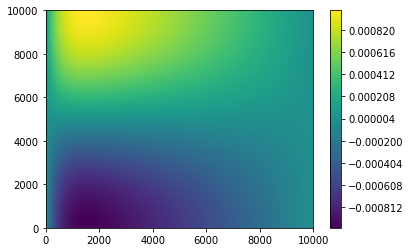

In [3]:
fieldset.U.show()

## ParticleSet creation

We do not create directly a single particle. In Parcels, we manipulate particles through a `ParticleSet`

a `ParticleSet` constructor needs to know the particle initial position (lon, lat, depth) and time. It also needs the Particle type `pclass` (e.g.: ScipyParticle, JITParticle) 

* Create a particle set with three particles located at longitude 100, 120, 130 and lat 5000.
* Advect the particles for one day, using a time step of 1 hour.
* Print the final positions of the particles

In [4]:
from parcels import ParticleSet, JITParticle, ScipyParticle, AdvectionEE
from datetime import timedelta as delta

lon = [100, 120, 130]
lat = [5000] * 3

help(ParticleSet.from_list)
# to do

Help on method from_list in module parcels.particleset:

from_list(cls, fieldset, pclass, lon, lat, depth=None, time=None, repeatdt=None) method of __builtin__.type instance
    Initialise the ParticleSet from lists of lon and lat
    
    :param fieldset: :mod:`parcels.fieldset.FieldSet` object from which to sample velocity
    :param pclass: mod:`parcels.particle.JITParticle` or :mod:`parcels.particle.ScipyParticle`
             object that defines custom particle
    :param lon: List of initial longitude values for particles
    :param lat: List of initial latitude values for particles
    :param depth: Optional list of initial depth values for particles. Default is 0m
    :param time: Optional list of start time values for particles. Default is fieldset.U.time[0]
    :param repeatdt: Optional interval (in seconds) on which to repeat the release of the ParticleSet



While a ScipyParticle particle set is executed completely in Python, a JITParticle pset is executed in C.
* Evaluate the execution time for Scipy and JIT modes

In [5]:
import time as timelib

# To do

## Define a customed Particle

A important feature of Parcels is to enable a large variety of particles, which can contain user-defined variables.
The default variables are lon, lat, depth, time, id, but any other variable can be added by the user.

* Create a customed ParticleClass, containing two variables p and p_start.
* Create a new ParticleSet and execute it.

In [6]:
from parcels import Variable

class MyParticle(JITParticle):
    #to do
    pass
    
# to do

There is no point to create new variables if they are not updated during the simulation

* Create a new kernel UpdateP, which interpolates the stream function at the current particle location

In [7]:

# to do

## Particle file

To save the particle trajectories, a `ParticleFile` object can be created and called in the execution command.

In [8]:

# pset creation .. to do

#output_file = pset.ParticleFile(name="StommelParticle", outputdt=outputdt)

# pset execution .. to do



from parcels import plotTrajectoriesFile
#plotTrajectoriesFile('StommelParticle.nc', mode='movie2d_notebook')

## Runge-Kutta 4 time integration

* Instead of using the `AdvectionEE` kernel, define your own kernel, which integrates the velocity field using the Runge-Kutta 4 scheme.
* Simulate the particle trajectories using this new kernel

In [9]:
# to do